<img src="https://drive.google.com/uc?export=view&id=1uDiRDsBQS2OijoIu83KvnqRfAOlToUk2" style="width: 200px;"/>

# Classical Algorithms
##### Marek Jeliński

Description:
- The goal of this notebook is to get familiar with classical algorithms.
- This notebook covers topics like Linear Regression, Logistic Regression, Decision Trees, KNN and SVM.
- You will learn how simple it is to create simple model with the help of scikit-learn.

<a href="TODO">Run in Google Colab</a>
## Table of Contents 
**[1. Linear Regression](#1.-Section-1)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Data Initialization](#1.1-Subsection-1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loss and prediction function](#1.2-Subsection-1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Model Training](#1.3-Subsection-1.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Results](#1.4-Subsection-1.4)<br>
**[2. Logistic Regression](#2.-Section-2)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Data](#2.1-Subsection-2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Logitic Regression Model](#2.2-Subsection-2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Evaluation](#2.3-Subsection-2.3)<br>
**[3. Decision Trees](#3.-Section-3)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Data](#3.1-Subsection-3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Decision Tree Model](#3.2-Subsection-3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Evaluation](#3.3-Subsection-3.3)<br>
**[4. K-Nearest Neigbor](#4.-Section-4)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Data](#4.1-Subsection-4.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2 KNN Model](#4.2-Subsection-4.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.3 Evaluation](#4.3-Subsection-4.3)<br>
**[4. SVM](#5.-Section-5)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[5.1 Data](#5.1-Subsection-5.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.2 Functions for mapping decision boundaries](#5.2-Subsection-5.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.3 PCA dimensionality reduction](#5.3-Subsection-5.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.4 Support Vector Machine (SVM) linear model](#5.4-Subsection-5.4)<br>

---
<a name="1.-Section-1"></a>
# 1. Linear Regression

The formula for linear regression with a single independent variable is,

  y = W*x + b

where,<br>
y is the dependent variable,<br>
x is the independent variable,<br>
W is the weight, and<br>
b is the bias.<br>

We will be using TensorFlow to find the value of weight w and bias b that can best predict the value y given x.

Importing necessary libraries

In [64]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<a name="1.1-Subsection-1.1"></a>
## 1.1 Data Initialization

Generate some random data for training the Linear Regression Model.

In [65]:
# the training dataset
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

Visualization of the training data.

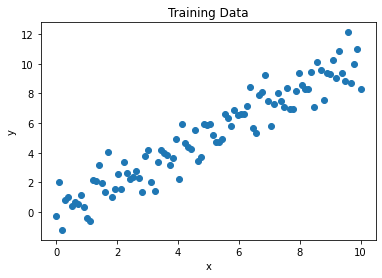

In [66]:
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

<a name="1.2-Subsection-1.2"></a>
## 1.2 Loss and prediction function


Let’s define the weight and bias. This is usually set randomly.

In [67]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

After this, let’s define the linear regression function to get predicted values of y, or y_pred.

In [68]:
# Define linear regression expression y
def linreg(x):
  y = weight*x + bias
  return y

Now, define the loss function, which in this case is MSE.

In [69]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

<a name="1.3-Subsection-1.3"></a>
## 1.3 Model Training


Now that you have all functions defined, the next step is to train the model.
<br>
We will be using gradient tape here to keep track of the loss after every epoch and then to differentiate that loss with respect to the weight and bias to get gradients.
<br>
This gradient will then be multiplied with the learning rate and subtracted from the existing value of parameters to get new optimized parameter values.

In [70]:
# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# train model
for epoch in range(training_epochs):

  # Compute loss within Gradient Tape context
  with tf.GradientTape() as tape:
    y_predicted = linreg(x_train)
    loss = squared_error(y_predicted, y_train)

  # Get gradients
  gradients = tape.gradient(loss, [weight,bias])

  # Adjust weights
  weight.assign_sub(gradients[0]*learning_rate)
  bias.assign_sub(gradients[1]*learning_rate)

  # Print output
  print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 36.891902923583984
Epoch count 1: Loss value: 4.526712894439697
Epoch count 2: Loss value: 1.3166717290878296
Epoch count 3: Loss value: 0.9982717037200928
Epoch count 4: Loss value: 0.966667890548706
Epoch count 5: Loss value: 0.9635093808174133
Epoch count 6: Loss value: 0.9631720781326294
Epoch count 7: Loss value: 0.9631150960922241
Epoch count 8: Loss value: 0.9630857706069946
Epoch count 9: Loss value: 0.9630596041679382
Epoch count 10: Loss value: 0.9630341529846191
Epoch count 11: Loss value: 0.9630088806152344
Epoch count 12: Loss value: 0.9629837274551392
Epoch count 13: Loss value: 0.9629590511322021
Epoch count 14: Loss value: 0.9629345536231995
Epoch count 15: Loss value: 0.9629100561141968
Epoch count 16: Loss value: 0.9628860950469971
Epoch count 17: Loss value: 0.9628622531890869
Epoch count 18: Loss value: 0.9628385901451111
Epoch count 19: Loss value: 0.9628151655197144
Epoch count 20: Loss value: 0.9627922177314758
Epoch count 21: Loss valu

<a name="1.4-Subsection-1.4"></a>
## 1.4 Results


The training process is now complete. You can see that the model reached near minimum loss in the 6th epoch itself. Thanks to gradient tape. Let’s see the final value of weight and bias.

In [71]:
print(weight.numpy())
print(bias.numpy())

1.0189908
0.110945135


The final step of this linear regression model is to plot the best fit line based on our final optimized parameter values.

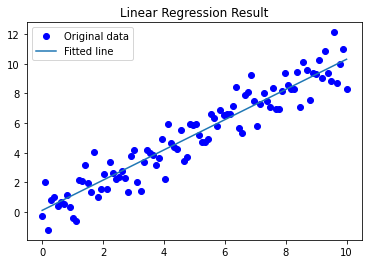

In [72]:
# Plotting the Results
plt.plot(x_train, y_train, 'ro', label ='Original data',color="blue")
plt.plot(x_train, linreg(x_train), label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

---
<a name="2.-Section-2"></a>
# 2. Logistic Regression

Importing necessary libraries

In [73]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets
import seaborn as sns

%matplotlib inline

<a name="2.1-Subsection-2.1"></a>
## 2.1 Data

In [74]:
d = sns.load_dataset("iris")
d.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualize the data

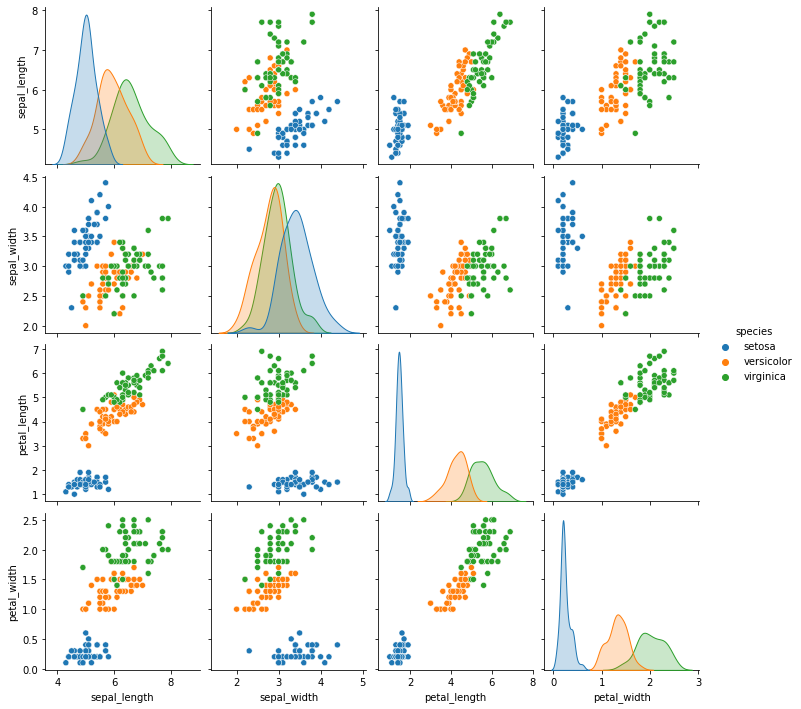

In [75]:
import seaborn as sns
sns.pairplot(d,hue = 'species')

Preparing data for our model

In [76]:
X = d.drop(['species'], axis = 1)
Y = d['species']

Splitting data into two sets

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


<a name="2.2-Subsection-2.2"></a>
## 2.2 Logitic Regression Model




In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

<a name="2.3-Subsection-2.3"></a>
## 2.3 Evaluation

In [79]:
model.score(x_test, y_test)

0.9

In [80]:
from sklearn import metrics
print("Model Accuracy :", metrics.accuracy_score(y_test, model.predict(x_test)))

Model Accuracy : 0.9


In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  6]])

Plot confusion matrix

Text(69.0, 0.5, 'Truth')

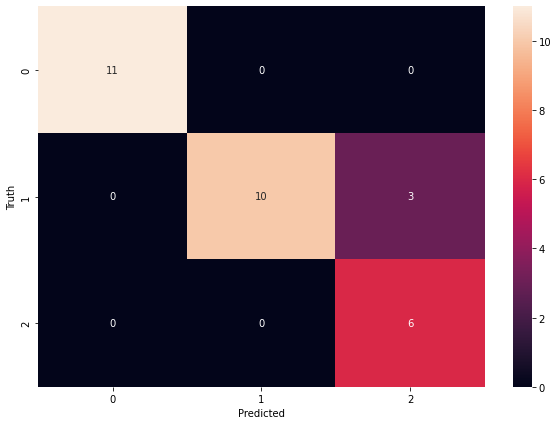

In [82]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

---
<a name="3.-Section-3"></a>
# 3. Decision Trees

Importing necessary libraries

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import tree

%matplotlib inline

<a name="3.1-Subsection-3.1"></a>
## 3.1 Data

Load data

In [84]:
data = sns.load_dataset("iris")
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Preparing data for our model

In [85]:
target_col = ['species']
X = data.drop(['species'], axis=1)

y = data['species']

Splitting data into two sets

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

<a name="3.2-Subsection-3.2"></a>
## 3.2 Decision Tree Model


In [87]:
from sklearn.tree import DecisionTreeClassifier

Training model

In [88]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

<a name="3.3-Subsection-3.3"></a>
## 3.3 Evaluation


Predicting classification on test set

In [89]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [90]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))# y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 0.9800


Predicting classification on train set

In [91]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicol

In [92]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9700


Comparing accuracy

In [93]:
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9700
Test set score: 0.9800


Plotting decision tree

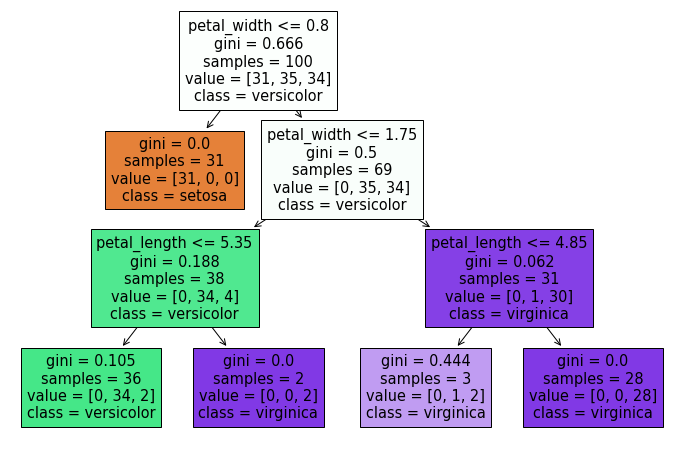

In [94]:
plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf_gini.fit(X_train, y_train),
               feature_names=list(data.columns[:-1]),  
               class_names=data["species"].unique(),
               filled=True) 

---
<a name="4.-Section-4"></a>
# 4. K-Nearest Neigbor 

Importing necessary libraries

In [95]:
import seaborn as sns
import pandas as pd

<a name="4.1-Subsection-4.1"></a>
## 4.1 Data

Load data

In [96]:
iris = sns.load_dataset("iris")

Visualize data

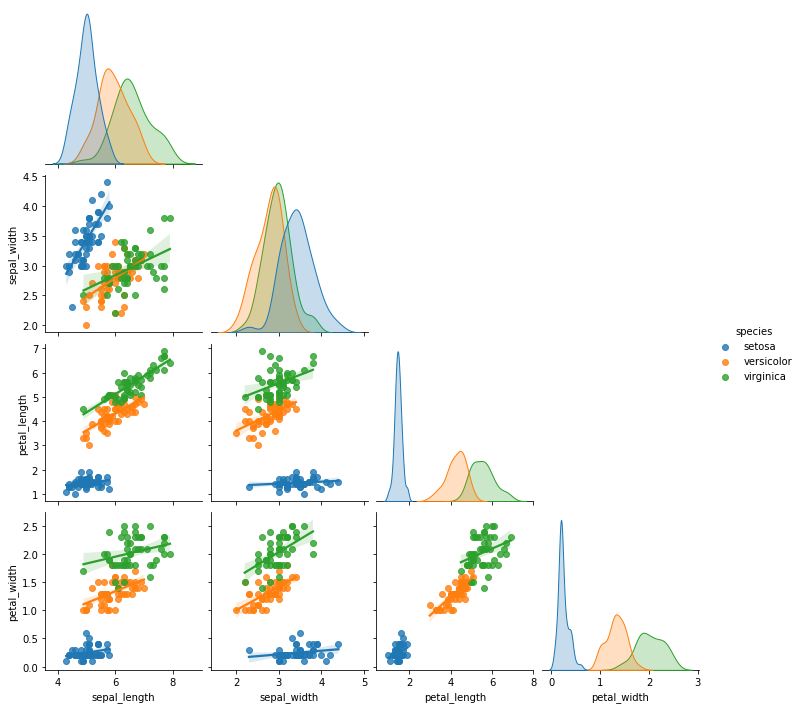

In [97]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

Preparing data for our model

In [98]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value
test = iris.drop(train.index)
X_train = train.drop(labels='species', axis=1)
y_train = train.species
X_test = test.drop(labels='species', axis=1)
y_test = test.species

<a name="4.2-Subsection-4.2"></a>
## 4.2 KNN Model


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Training our model

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

<a name="4.3-Subsection-4.3"></a>
## 4.3 Evaluation


Check score of our model

In [101]:
knn.score(X_test,y_test)

0.9555555555555556

Make classification predictions

In [102]:
results = knn.predict(X_test)

In [103]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


Confusion matrix

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)
cm

array([[12,  0,  0],
       [ 0, 20,  2],
       [ 0,  0, 11]])

Text(69.0, 0.5, 'Truth')

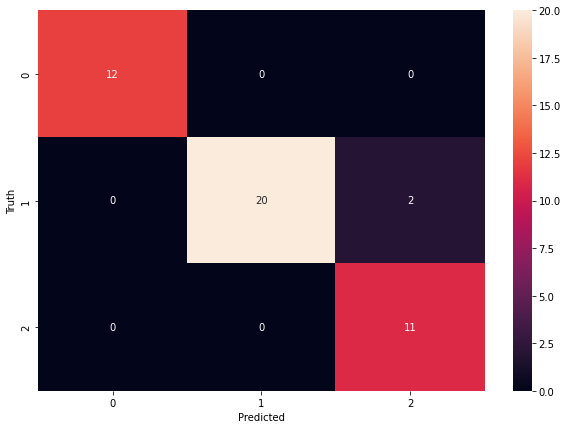

In [105]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

---
<a name="5.-Section-5"></a>
# 5. SVM

Importing necessary libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

<a name="5.1-Subsection-5.1"></a>
## 5.1 Data

Load data

In [107]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Splitting data into two sets

In [108]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


<a name="5.2-Subsection-5.2"></a>
## 5.2 Functions for mapping decision boundaries


Function for the meshgrid

In [109]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

Function for ploting the entire meshgrid

In [110]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

<a name="5.3-Subsection-5.3"></a>
## 5.3 PCA dimensionality reduction



The original iris 4 features have been reduced to 2 dimensions to facilitate visualisation.

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

<a name="5.4-Subsection-5.4"></a>
## 5.4 Support Vector Machine (SVM) linear model




Parameters:
- C: Limit the complexity of the model to prevent overfitting.
- max_iter: Maximum number of iterations, default 1000.

Text(0.5, 1.0, 'LinearSVC (linear kernel)\nAccuracy:0.96')

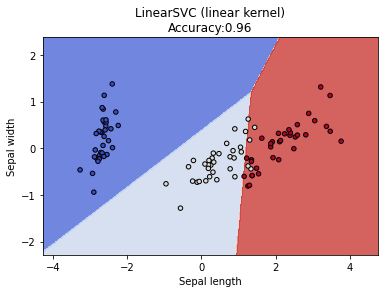

In [112]:
from sklearn import svm

# Build linearSvc model
linearSvcModel=svm.LinearSVC(C=1, max_iter=10000)
# Train model
linearSvcModel.fit(train_reduced, y_train)
# Using training data to predict classification
predicted=linearSvcModel.predict(train_reduced)
# Calculate Accuracy
accuracy = linearSvcModel.score(train_reduced, y_train)
#Plotting
X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, linearSvcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LinearSVC (linear kernel)'+ '\n' + 'Accuracy:%.2f'%accuracy)

---

This notebook is a part of introductory machine learning course, led by the [Gradient](https://gradient.eti.pg.gda.pl/) science club in the 2022/2023 school year.

<img src="https://drive.google.com/uc?export=view&id=1P7SX6J_GWlS1ENxVaZCcBO0BxHP6ULEg" width="1050"/>